<a href="https://colab.research.google.com/github/halaabbadi1/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project title: (Prediction of Product Sales)

- Author: Hala Abbadi

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


* There are 12 columns and 8523 rows
* Data types are objects, floats and integers

## Cleaning Data

## Data Visualization


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

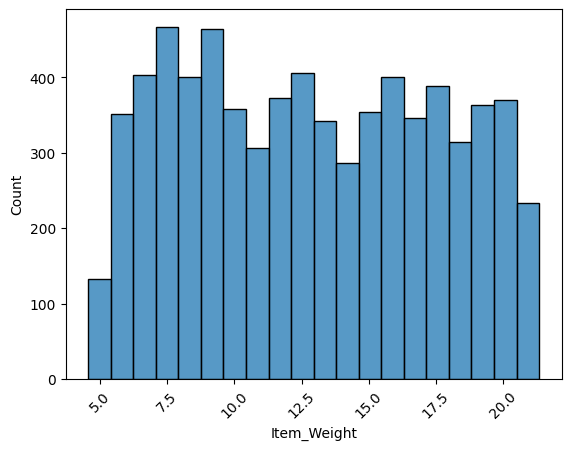

In [6]:
ax = sns.histplot(data = df,x = 'Item_Weight')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain');

- A histogram distribution of the items weight

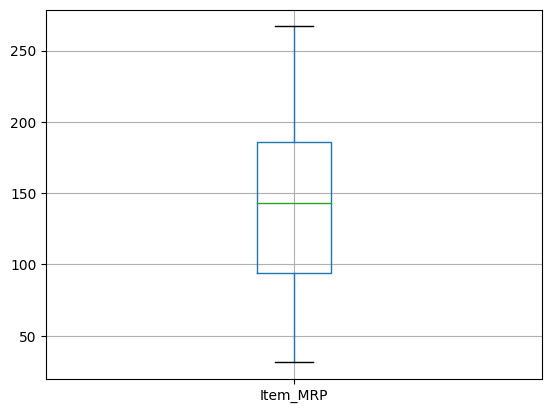

In [7]:
ax = df.boxplot(column = 'Item_MRP')
ax;

- A box plot to see the statistical distribution of the items Maximum Retail Price

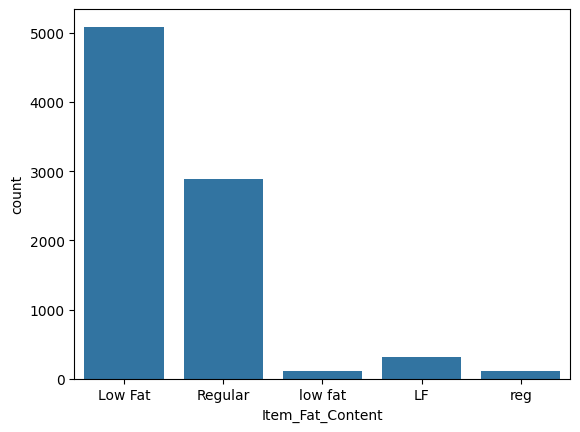

In [8]:
ax = sns.countplot(data = df, x = 'Item_Fat_Content')

- A count plot distribution of the items fat contents

In [9]:
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.03,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.03,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


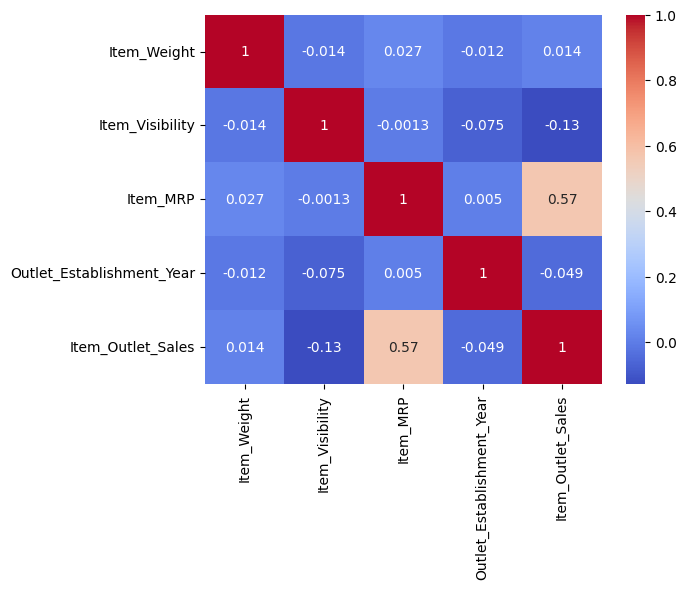

In [10]:
fig, ax = plt.subplots()
sns.heatmap(corr, cmap = 'coolwarm', annot = True);

- A heatmap that views the corrolation between features

In [11]:
def explore_categorical(df, x, y = 'Item_Outlet_Sales', fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  temp_df = df.copy()

  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100

  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  fig, ax = plt.subplots(figsize=figsize)

  sns.countplot(data=temp_df, x=x, ax=ax, order=order)

  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  ax.set_title(f"Column: {x}")
  fig.tight_layout()
  plt.show()


  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  val_counts = temp_df[x].value_counts(dropna=False)
  most_common_val = val_counts.index[0]
  freq = val_counts.values[0]
  perc_most_common = freq / len(temp_df) * 100
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax



In [12]:
def plot_categorical_vs_target(df, x,y = 'Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):

  temp_df = df.copy()
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  else:
    temp_df = temp_df.dropna(subset=[x])

  fig, ax = plt.subplots(figsize=figsize)


  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)

  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax



In [13]:
def explore_numeric(df, x, y = 'Item_Outlet_Sales',figsize=(6,5) ):

  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)

  sns.histplot(data=df, x=x, ax=axes[0])

  sns.boxplot(data=df, x=x, ax=axes[1])

  axes[0].set_title(f"Column: {x}")

  fig.tight_layout()


  plt.show()

  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")
  val_counts = df[x].value_counts(dropna=False)
  most_common_val = val_counts.index[0]
  freq = val_counts.values[0]
  perc_most_common = freq / len(df) * 100
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")



In [14]:
def plot_numeric_vs_target(df, x, y = 'Item_Outlet_Sales', figsize=(6,4)):

  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ax.set_title(f"{x} vs. {y} (r = {r})")
  plt.show()
  return fig, ax



# EDA



 Variable Name	              Description
1. Item_Identifier	             Product ID.
2. Item_Weight	                 Weight of product.
3. Item_Fat_Content	             Whether the product is low-fat or regular.
4. Item_Visibility	             The percentage of total display area of all
                                 products in a store allocated to the particular product.
5. Item_Type	                   The category to which the product belongs.
6. Item_MRP	                     Maximum Retail Price (list price) of the
                                 product.
7. Outlet_Identifier	           Store ID
8. Outlet_Establishment_Year	   The year in which store was established
9. Outlet_Size	                 The size of the store in terms of ground area
                                 covered
10. Outlet_Location_Type	       The type of area in which the store is located
11. Outlet_Type	                 Whether the outlet is a grocery store or   
                                 some sort of supermarket
12. Item_Outlet_Sales	           Sales of the product in the particular     
                                 store.   



In [22]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [23]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                          'low fat':'Low Fat',
                                                          'reg':'Regular'})

In [24]:
x = 'Item_Fat_Content'
y = 'Item_Outlet_Sales'

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

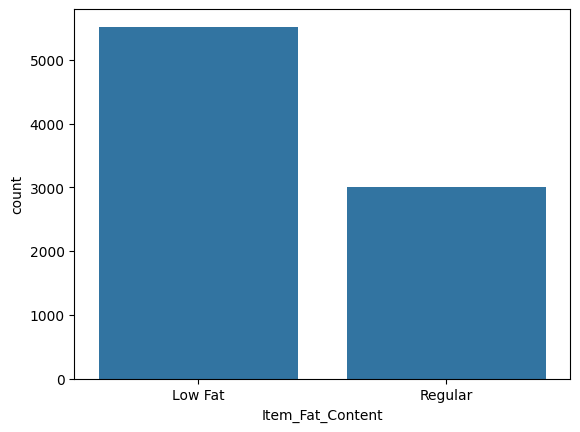

In [28]:
# Fill missing values with a placeholder
# Define the placeholder
placeholder = 'MISSING'
# fillna with placeholder
df[x] = df[x].fillna(placeholder)
# Striplot and barplot in one plot with placeholder
# Default Barplot
sns.countplot(data=df, x=x)

* the feature type is nominal
* there are no missing values
* it's not constant or quasi-constant feature
* the cardinality is 2 which is not high
* thereis no business case/understanding reason to exclude based on our business case

In [30]:
x = 'Item_Fat_Content'
y = 'Item_Outlet_Sales'

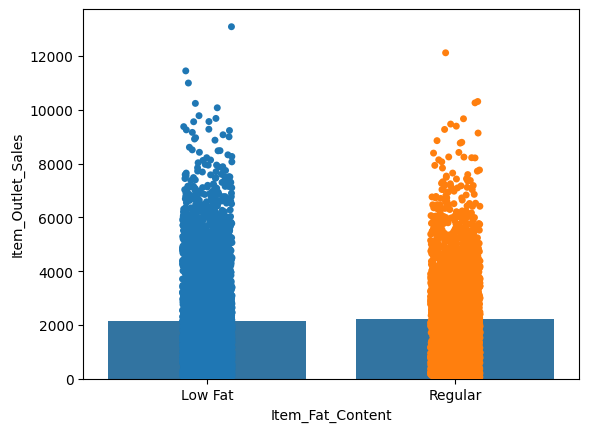

In [35]:
# Fill missing values with a placeholder
# Define the placeholder
placeholder = 'MISSING'
# fillna with placeholder
df[x] = df[x].fillna(placeholder)
# Striplot and barplot in one plot with placeholder
# Default Barplot
sns.barplot(data=df, x = x, y = y)
# Include hue argument with the stripplot
sns.stripplot(data = df, x=x, y=y, hue = x);

* i did expect this to be a predictor of the target